## Description

### 1. Rule 생성
### 2. Input generation while checking Feasibility
- Whether the rule can be applied
- Whether the target can be guessed

### 3. 결과물 Rendering


# Rendering

In [1]:
import cv2

In [31]:
from rendering import render_panel

In [32]:
img1 = render_panel(start_node)

In [33]:
# turn on img with new window
cv2.imshow('result1', img1)
cv2.waitKey(1)
cv2.moveWindow('result1', 0, 0)

In [34]:
img = render_panel(output)

In [35]:
# turn on img with new window
cv2.imshow('result', img)
cv2.waitKey(1)
cv2.moveWindow('result', 200, 0)

In [15]:
# turn off all windows
cv2.destroyAllWindows()

### 1. Rule 생성

In [11]:
from const import *
from sampling import sample_rules

In [19]:
rule_groups = sample_rules()

the rule is sampled 
 Progression_new Color -1 
 its target :  Type triangle


**특정 Rule check**

In [14]:
from Rule import Rule_Wrapper

In [23]:
rule = Rule_Wrapper(name = 'Progression_new', 
             attr = 'Size',
             param = [2],
             component_idx = 0,
             tgt_attr = "Type")

### 2. Input generation while checking Feasibility
- Whether the rule can be applied

with _prune() function

In [16]:
import copy

In [17]:
# 우선 2x2 grid setting에서만
from build_tree import build_distribute_four

In [22]:
root = build_distribute_four()

In [23]:
start_node = root.sample(rule_groups[0])

In [18]:
root = build_distribute_four()
start_node = root.sample(rule_groups[0])
for i in range(len(start_node.children[0].children[0].children[0].children)):
    ent = start_node.children[0].children[0].children[0].children[i]
    print(ent.type.get_value(), ent.size.get_value())

NameError: name 'rule_groups' is not defined

In [41]:
ent = start_node.children[0].children[0].children[0].children[1]
print(ent.type.get_value(), ent.size.get_value())
ent.entity_constraint["Color"]

triangle 0.4


[2, 9]

In [8]:
output = copy.deepcopy(start_node)
rule_groups[0].apply_rule(output)

Root.Scene

In [62]:
img1 = render_panel(start_node)

In [57]:
img1.shape

(160, 160)

In [17]:
img1 = render_panel(start_node)
cv2.imshow('result1', img1)
cv2.waitKey(1)
cv2.moveWindow('result1', 0, 0)

In [161]:
# turn off all windows
cv2.destroyAllWindows()

## 3. Modulize all of the process

In [13]:
pair_per_oper = 10
n_oper = 10

In [41]:
dataset = {}
rule_configs = []

In [42]:
config_attr = ['attr', 'value', 'tgt_attr', 'tgt_value']

In [43]:
rule_config = [str(rule_groups[0].__dict__[attr]) for attr in config_attr]
rule_config_str = ' '.join(rule_config)

In [44]:
# sample only the unique rule
for i in range(n_oper):
    while True:
        rule_groups = sample_rules()
        rule_config = [str(rule_groups[0].__dict__[attr]) for attr in config_attr]
        rule_config_str = ' '.join(rule_config)
        if rule_config_str not in rule_configs:
            rule_configs += [rule_config_str]
            break

the rule is sampled 
 Progression_new Angle -2 
 its target :  Size 0.8
the rule is sampled 
 Progression_new Angle 1 
 its target :  Type triangle
the rule is sampled 
 Progression_new Color 2 
 its target :  Color 84
the rule is sampled 
 Progression_new Color -2 
 its target :  Type triangle
the rule is sampled 
 Progression_new Angle 2 
 its target :  Size 0.7
the rule is sampled 
 Progression_new Size -2 
 its target :  Type hexagon
the rule is sampled 
 Progression_new Color -1 
 its target :  Size 0.5
the rule is sampled 
 Progression_new Color -2 
 its target :  Size 0.9
the rule is sampled 
 Progression_new Color -1 
 its target :  Type pentagon
the rule is sampled 
 Progression_new Size -2 
 its target :  Size 0.5


In [46]:
len(rule_configs)

10

In [6]:
rule_groups = sample_rules()

the rule is sampled 
 Progression_new Color 1 
 its target :  Type circle


In [17]:
rule = rule_groups[0]

In [48]:
lst_pair = []

In [16]:
def set_target_with_condition(AoT, attr, value):
    results = {}
    Components = AoT.children[0].children
    for comp_idx, comp in enumerate(Components):
        Entities = comp.children[0].children
        entity_idxs = []
        for ent_idx, ent in enumerate(Entities):
            if attr == "Type":
                if ent.type.get_value() == value:
                    entity_idxs += [ent_idx]
            if attr == "Size":
                if ent.size.get_value() == value:
                    entity_idxs += [ent_idx]
            if attr == "Color":
                if ent.color.get_value() == value:
                    entity_idxs += [ent_idx]
        results[comp_idx] = entity_idxs
        
    return results

In [23]:
tgt_idxs = set_target_with_condition(start_node, rule.tgt_attr, rule.tgt_value)
tgt_idxs

{0: [0]}

In [27]:
start_node.children[0].children[0].children[0].children[0]

Entity.0

In [29]:
output = rule.apply_rule(start_node, entity_idxs = tgt_idxs[0])

In [ ]:
for j in range(pair_per_oper):
    root = build_distribute_four()
    start_node = root.sample(rule)
                

In [36]:
img1 = render_panel(start_node)

In [38]:
img1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [40]:
list({}.values())

[]

## 4. Check the module

In [2]:
len([])

0

In [3]:
from generation import *

In [4]:
config_attr = ['attr', 'value', 'tgt_attr', 'tgt_value']

In [6]:
dataset = generate_pairs(n_oper=10, pair_per_oper=4, config_attr=config_attr, debug=True)

operation 0 : 4
operation 1 : 4
operation 2 : 4
operation 3 : 4
operation 4 : 4
operation 5 : 4
operation 6 : 4
operation 7 : 4
operation 8 : 4
operation 9 : 4
#(operations) : 10
Iteration ends


In [75]:
samples

[None, <Rule.Progression_new at 0x161ff863e88>]

In [76]:
samples = samples[1]

In [77]:
print(samples.attr, samples.value, samples.tgt_attr, samples.tgt_value)

Size -2 Size 0.8


In [6]:
samples.children[0].children[0].children[0].children

[Entity.0, Entity.1, Entity.2]

In [10]:
ent = samples.children[0].children[0].children[0].children
for i in range(len((ent))):
    print(ent[i].type.get_value(), ent[i].size.get_value(), ent[i].color.get_value(), ent[i].angle.get_value_level())
    ent[i].entity_constraint["Angle"]

pentagon 0.6 84 7
pentagon 0.4 56 9
circle 0.4 56 9


In [74]:
img1 = samples[0][0]['in'][0]
img = samples[0][0]['out'][0]

### 5. Construct the complete question

In [26]:
import numpy as np
import os

In [27]:
from generation import *

In [28]:
n_qs = 3000
n_cands = 5

In [29]:
config_attr = ['attr', 'value', 'tgt_attr', 'tgt_value']

In [30]:
for i in range(n_qs):
    qa = {}
    data_src = generate_pairs(n_oper=n_cands, pair_per_oper=4, config_attr=config_attr)

    cands = [data_src[i]['data'][0] for i in range(n_cands)]
    idx_cands = np.arange(n_cands)
    np.random.shuffle(idx_cands)
    ans_label = np.where(idx_cands==0)[0][0]
        
    qa['question'] = data_src[0]['data'][1]
    qa['answer'] = {'label' : ans_label,
                    'rule'  : data_src[0]['rule']}
    qa['candidates'] = [cands[idx] for idx in idx_cands]
    
    nm_file = 'question_pair_'+ format(i, '04') + '.npz'
    np.savez(os.path.join('data', nm_file), **qa)

In [20]:
qa = {}

In [5]:
data_src = generate_pairs(n_oper=n_cands, pair_per_oper=4, config_attr=config_attr)

In [22]:
qa['question'] = data_src[0]['data'][1]

In [24]:
cands = [data_src[i]['data'][0] for i in range(n_cands)]

In [39]:
idx_cands = np.arange(n_cands)
np.random.shuffle(idx_cands)

[4 2 1 0 3]


In [41]:
ans_label = np.where(idx_cands==0)[0][0]

3

In [ ]:
qa['candidates'] = [cands[idx] for idx in idx_cands]

In [ ]:
qa['answer'] = {'label' : ans_label,
                'rule'  : data_src[0]['rule']}

## 6. Load and Visualize

In [31]:
%matplotlib inline

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
qa = np.load('data/question_pair_1000.npz', allow_pickle=True)

In [15]:
qa.files

['question', 'answer', 'candidates']

In [16]:
qa['answer']

array({'label': 1, 'rule': 'Angle -1 Size 0.5'}, dtype=object)

In [17]:
qa['question']

array({'in': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'out': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)}, dtype=object)

In [18]:
qa['candidates']

array([{'in': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'out': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)},
       {'in': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'out': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 25

In [106]:
qa['answer'].item()

{'label': 0, 'rule': 'Size -1 Color 56'}

In [40]:
image = []

image += [qa['question'].item()['in']]
image += [qa['question'].item()['out']]

for i in range(n_cands):
    image += [qa['candidates'][i]['in']]
    image += [qa['candidates'][i]['out']]

attr / value / tgt_attr / tgt_value 
 Color -2 Type hexagon 
 answer label :  3


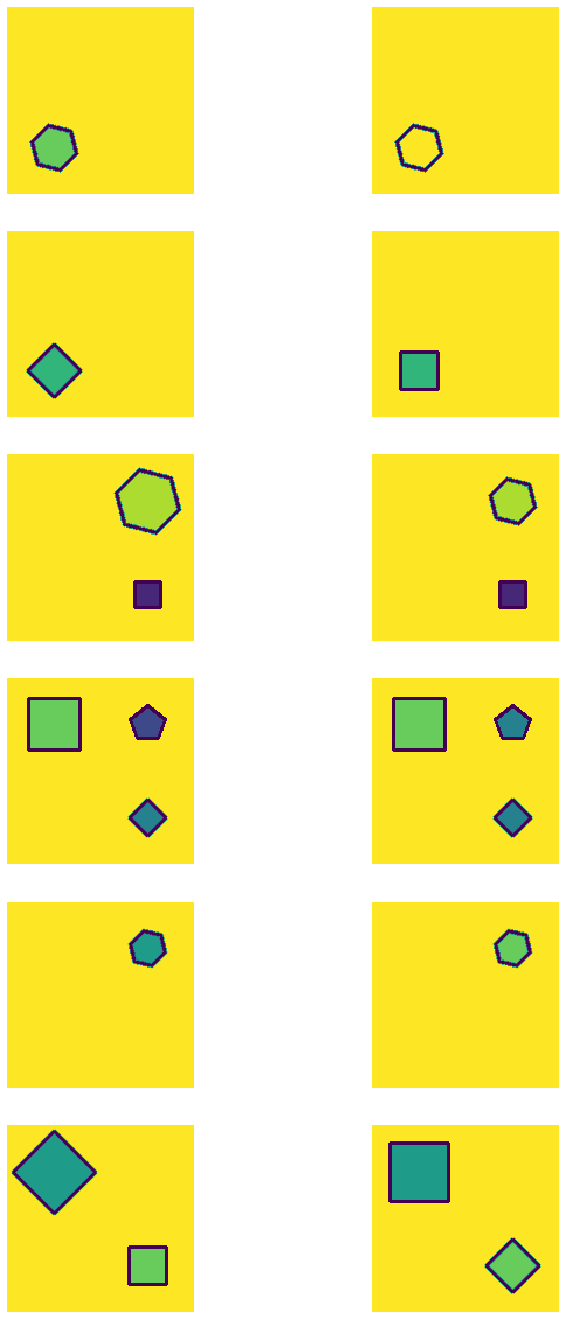

In [41]:
print('attr / value / tgt_attr / tgt_value \n', qa['answer'].item()['rule'], '\n answer label : ', qa['answer'].item()['label'])

col = 2 ; row = 6
fig = plt.figure(figsize = (12,24))
for i in range(col * row):
    fig.add_subplot(row, col, i + 1)
    plt.imshow(image[i], vmin = 0, vmax = 255)
    plt.axis('off')
plt.show()

In [ ]:
col = 3 ; row = 3
fig = plt.figure(figsize = (12,10))
for i in range(9):
    fig.add_subplot(row, col, i+1)
    plt.imshow(image[i], vmin = 0, vmax = 255)
plt.show()

In [71]:
import cv2

In [72]:
from rendering import render_panel

In [75]:
# turn on img with new window
cv2.imshow('result1', img1)
cv2.waitKey(1)
cv2.moveWindow('result1', 0, 0)

In [76]:
# turn on img with new window
cv2.imshow('result', img)
cv2.waitKey(1)
cv2.moveWindow('result', 200, 0)

In [77]:
# turn off all windows
cv2.destroyAllWindows()